<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Redes Generativas Adversarias</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Introducción</span>

Una parte importante de modelos de Aprendizaje automatizado son, como los vamos a llamar ahora, "modelos discriminadores", siendo capaces de diferenciar sobre diferentes tipos de datos. Entre estos están los modelos para las tareas de clasificación y detección.

Pero hay otro tipo de modelos cuya intención no es aprender de los datos para hacer inferencia sobre estos, sino aprender para generar nuevos datos. Estos son los "modelos generadores".

Vamos a charlar un poco del contexto de ambos tipos de modelos, junto con un una arquitectura que mezcla ambas clases de modelos para mejorar su rendimiento: Redes Generativas Adversarias.

## <span style="color:blue">Discriminación y generación</span>

Supongamos que tenemos una base de datos de fotos de tamaño 32x32, y queremos detectar si en estas hay un perro o un gato con base en las características que encontramos. Para hcer esto, definimos un modelo con:

- Etiquetas: $Y=y$
- Características: $X=\{x_1, x_2, \dots, x_n \}$

ahora, podemos pensar en cómo los modelos discriminadores y generadores utilizan estas variables para aprender y obtener resultados



### <span style="color:blue">Modelos discriminadores</span>

El modelo discriminador es esencialmente el modelo de la probabilidad de las etiquetas o "variable respuesta" $Y$, dadas las características o "variables de observación" $X$. Al final, queremos obtener las probabilidades de los casos de $P(Y|X=x)$. En resumidas cuentas, el modelo recibe las características y entrega las probabilidades de cada etiqueta.

En nuestro ejemplo, con base en las características de la foto que le demos al modelo, este va a darnos dos probabilidades, la probabilidad de sea gato y que sea perro. Luego obtenemos el valor máximo de estas probabilidades para tener la "predicción final".

Como se dijo con anterioridad, la mayoría de modelos enseñados tradicionalmente forman parte de esta categoría: Regresiones, Máquinas de soporte vectorial, Perceptrones e incluso las redes CNN con un componente completamente conectado.

### <span style="color:blue">Modelos generadores</span>

El modelo generador hace las cosas un poco diferente, aunque hay varias formas de verlo:

En la primera forma, el modelo generador es el modelo de la probabilidad de las variables de observación $X$, dada la variable respuesta $Y$. Así que se buscan las probabilidades de todos los casos $P(X|Y = y)$. 

En nuestro ejemplo, con base en la etiqueta que le demos, como "perro", el modelo va a generar las probabilidades de todas las posibles imágenes que pueden hacerse. en este caso $256^{32 \times 32}$. Luego se obtiene aquella imagen con la mayor probabilidad, o la que el modelo cree que es la que mayor tiene que ver con la etiqueta "perro".

Aunque esta no es la única forma de verlo. También se han planteado los modelos generadores como los modelos de las probabilidades conjuntas de $P(X,Y)$. Diciendo, de alguna forma, que no estamos seguros de lo que queremos, así que busquemos las probabilidades de todas las posibles combinaciones de características y etiquetas.

En el último caso de nuestro ejemplo, Modelaremos todas estas combinaciones, las cuales son $256^{32 \times 32}*2$, y para buscar aquella imagen que el modelo piense que es la más cercana a ser un "perro", se busca el máximo de las probabilidades de $P(X, Y=\text{perro})$.

Esto no significa que estas dos definiciones sean completamente separadas. Sabemos que las probabilidades conjuntos pueden encontrarse a partír de las condicionales

\begin{align}
    P(X,Y)=P(X|Y)P(Y)
\end{align}

Así que, si podemos modelar $P(Y)$, podemos pasar de una definición a otra.


De hecho ya hemos visto un ejemplo de modelos generadores con los [Autoencoders](../../Autocodificadores/Cuadernos/ae_Example_Dense_mnist.ipynb)

## <span style="color:blue">Redes Generativas Adversarias</span>

Hablemos de Poker

<figure>
<center>
<img src="../Imagenes/poker.gif" width="400" height="300" align="center"/> 
</center>
</figure>

Indiscutiblemente, la parte más interesante de este pseudodeporte es la parte de los "juegos mentales". El tener una mala mano, pero convencer que es buena, ganando a pesar de no tener nada. O poder pescar a quienes están mintiendo, ya bien sea un pequeño tick o una corazonada. Y es incluso más emocionante cuando se esta uno contra uno, en una situación de ADVERSARIOS.

El nombre que se le da a esta arquitectura no es por nada. De hecho, se toma mucho la idea del "juego" y la competitividad(la cual ha impulsado tanto el desarrollo de la visión aritifical), pero esta vez no será por parte de los desarrolladores, las mismas redes van a competir entre sí.

Las Redes Generativas Adversarias(Generative Adversarial Networks o GANs como vamos a llamarlas), tienen la diferencia más importante en el entrenamiento de dos redes que no están conectadas directamente y que nisiquiera tienen la misma tarea.

Estas dos redes van a ser:

- Red generadora: Crea imágenes a partír de datos aleatorios. Aprende a hacerlas mejor con cada intervención
- Red discriminadora: Busca decidir qué imagenes son "reales" y cuáles fueron creadas por la red generadora. Aprende a detallar más las diferencias entre los dos tipos de datos.

<figure>
<center>
<img src="../Imagenes/gan1.png" width="900" height="500" align="center"/> 
</center>
</figure>

<figure>
<center>
<img src="../Imagenes/gan2.png" width="900" height="500" align="center"/> 
</center>
</figure>

Veamos un poco del algoritmo de las GANs:

En cada iteración sucede lo siguiente:

- Entrenamiento del discriminador:
    - Se toma un ejemplo real $x$ del dataset de entrenamiento
    - Se toma un vector de "ruido aleatorio" $z$ y se crea un ejemplo falso $x^*$ usando el generador
    - El discriminador clasifica $x$ y $x^*$ como "falso" o "verdadero"
    - Se computa el error de las clasifcaciones y hacemos backpropagation sobre el discriminador, buscando **minimizar** el error de clasificación

- Entrenamiento del generador:
    -  Se toma un vector de "ruido aleatorio" $z$ y se crea un ejemplo falso $x^*$ usando el generador
    - El discriminador clasifica $x^*$ como "falso" o "verdadero"
    - Se computa el error de la clasifcación y hacemos backpropagation sobre el generador, buscando **maximizar** el error de clasificación del discriminador

### <span style="color:blue">El entrenamiento de una GAN</span>

En una forma más gráfica

<figure>
<center>
<img src="../Imagenes/GAN_training.png" width="950" height="600" align="center"/> 
</center>
</figure>


Cosas a tomar en cuenta de este proceso:

- Los dos proceso de entrenamiento suceden **simultaneamente**. El entrenamiento de ambas redes está muy conectado
- La red generadora nunca recibe información por parte de la base de datos. Empieza verdaderamente desde 0

Por la naturaleza de este entrenamiento, es lógico preguntarse: ¿En qué momento suponemos que el entrenamiento está completo, si tenemos dos modelos aprendiendo y mejorando? como hemos dicho, estos dos modelos tienen una relación competitiva y, en forma resumida, estamos del bando del generador. Nuestro "estado de victoria" o "equilibrio", es cuando el generador sea tan bueno que la información que crea sea indiferente a la real, obligando al discriminador a, en el mejor de los casos, hacer una elección del 50/50. Es en este punto que, primero, el discriminador ya no puede hacer nada para mejorar si capacidad y, segundo, el generador ya no gana nada de más iteraciones. Es en este punto en el que decimos que ha convergido. Este estado de equilibrio es puramente teórico, así que se necesitan otras formas de calcular qué tan bueno es el desempeño de la red. cosa que se verá más adelante 

## <span style="color:blue">Increibles aplicaciones</span>

Las GANs son consideradas por muchos como unas de las ideas más interesantes de los últimos años, y se puede en sus aplicaciones. Varios de los trabajos hechos con esta arquitectura son tanto de los más innovadores como los más publicitados. Razón por la cual es buena idea repasar las posibilidades que tienen.


### <span style="color:blue">CycleGAN</span>

De igual forma que podemos traducir un texto de un idioma a otro, también podemos "traducir" una imagen de un dominio a otro. ¿Qué significa esto?

Imaginemos, si podemos, que tenemos una de las hermosas pinturas de Jean Claude Monet.

<figure>
<center>
<img src="../Imagenes/water-lilies.jpg" width="500" height="325 align="center"/> 
</center>
</figure>

Es inmediato el observar y apreciar la belleza de esta, pero a veces nos entra la curiosidad: ¿Qué estaba viendo él en la vida real para inspirarse? o ¿Cuál sería la interpretación de otro artista? Estos son los dominios que hablamos, pasamos del dominio "Monet" al dominio "Realidad"

Esta es la idea detrás de los CycleGAN

<figure>
<center>
<img src="../Imagenes/cyclegan-monet.png" width="800" height="350" align="center"/> 
</center>
</figure>

Los dominios no se reducen únicamente a diferentes artistas, los límites son pocos respecto a estos.

<figure>
<center>
<img src="../Imagenes/cyclegan-horse.png" width="800" height="350" align="center"/> 
</center>
</figure>

¿Cómo logran esto? Plantearon dos pequeños extras en la red GAN "tradicional".

- En lugar de tener "parejas ordenadas" $\{x_i, y_i \}$, cada uno de un respectivo dominio. Se toman los datasets como un "todo", permitiendo muestras más grandes, y logrando que se entienda más la idea general de cada dominio

<figure>
<center>
<img src="../Imagenes/paired_unpaired.png" width="450" height="275" align="center"/> 
</center>
</figure>

- Para observar la convergencia de las redes se hace un "ciclo" de la imagen real, a la versión transformada, y de nuevo al dominio original. Se hace una comparación entre la original y la versión "reconstruida", y con esto observamos la convergencia.

<figure>
<center>
<img src="../Imagenes/reconstruction.png" width="450" height="275" align="center"/> 
</center>
</figure>

Más del diseño de este puede verse en su [página oficial](https://junyanz.github.io/CycleGAN/)

### <span style="color:blue">StyleGAN</span>

En los inicios del desarrollo de las GANs y la generación de nuevo contenido visual, los inconvenientes principales eran la falta de detalle que tenían las imágenes y el reducido control que tendrían las personas sobre el tipo que fotos que quieren recibir. Esto signfica que, si le pedíamos una foto de un rostro a una de estas redes, el rostro no se vería de muy buena calidad, y tendríamos que conformarnos con la foto que haga, no podríamos decirle que haga una foto de un hombre con pelo corto y barba.

Nuestros viejos amigos de Nvidia desarrollaron "StyleGAN" donde hacen varias cosas nuevas en el proceso tradicional, cosas pequeñas como normalizar datos, trabajar distintos tamaños etc...

El cambio más grande fue el tomar a las imágenes como "grupos" de diferentes estilos. En el caso de los rostros los estilo pueden ser cosas como: forma del rostro, color del cabello, ojos, posición y esquema de los colores. Para definir estos estilos, se aplica una red de "mapeo de características", cuya salida entra al GAN principal junto con el vector aleatorio de ruido. Al final, el usuario sería capaz de cambiar los estilos de manera independiente.

<figure>
<center>
<img src="../Imagenes/face_generator.gif" width="650" height="350" align="center"/> 
</center>
</figure>

Se puede ver el desarrollo y evolución de esta forma de GAN [aquí](https://nvlabs.github.io/stylegan2/versions.html)

## <span style="color:blue">Programación básica de una GAN</span>

Comenzaremos con un proyecto sencillo para comprender la estructura básica de un código de GANs

En este caso, enseñaremos a una red a escribir dígitos de manera "manual", usando el dataset MNIST.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision.utils import make_grid

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_set = datasets.MNIST('/mnt/storage/Datasets', train=True, download=True, transform=transform)
#test_set = datasets.MNIST('/mnt/storage/Datasets', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
#test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

Escribimos una clase separada para cada modelo

In [3]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)
        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return nn.Sigmoid()(x)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(64, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 784)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return nn.Tanh()(x)
    
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [4]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))

loss = nn.BCELoss()

Definimos una función que genero ruido, el cuál alimentaremos a la red generadora

In [9]:
def noise(size):
    n = torch.randn(size, 64)
    return n.to(device)

Hacemos una función que defina el paso de entrenamiento del discriminador

In [10]:
def discriminator_train_step(real_data, fake_data):
    d_optimizer.zero_grad() #reiniciamos los gradientes
    
    #predecimos sobre los datos reales. Obtenemos la perdida y aplicamos backpropagation
    prediction_real = discriminator(real_data)
    #el valor esperado en este caso es 1 ya que son los datos reales
    error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))
    error_real.backward()
    
    #predecimos sobre los datos falsos. Obtenemos la perdida y aplicamos backpropagation
    prediction_fake = discriminator(fake_data)
    #el valor esperado en este caso es 0 ya que son los datos falsos
    error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
    error_fake.backward()
    #acutalizamos los pesos
    d_optimizer.step()
    #obtenemos la perdida total
    return error_real + error_fake

In [11]:
def generator_train_step(fake_data):
    g_optimizer.zero_grad() #reiniciamos los gradientes
    prediction = discriminator(fake_data) #predecimos sobre los datos falsos con el discriminador
    #definimos el valor esperado como 1, ya que queremos los casos en los que el discriminador falló en diferenciar
    error = loss(prediction, torch.ones(len(real_data), 1).to(device))  
    error.backward()
    g_optimizer.step()
    return error

In [12]:
d_losses = []
g_losses = []

for epoch in range(100):
    N = len(train_loader)
    d_loss_epoch = 0.0
    g_loss_epoch = 0.0
    for i, (images, _) in enumerate(train_loader):
        real_data = images.view(len(images), -1).to(device)
        fake_data = generator(noise(len(real_data))).to(device)
        fake_data = fake_data.detach()
        d_loss = discriminator_train_step(real_data, fake_data)
        fake_data = generator(noise(len(real_data))).to(device)
        g_loss = generator_train_step(fake_data)
        d_loss_epoch += d_loss
        g_loss_epoch += g_loss
        if i % 100 == 0 or i == N:
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'
                  .format(epoch, 100, i, len(train_loader), d_loss.item(), g_loss.item()))
    d_losses.append(d_loss_epoch/N)
    g_losses.append(g_loss_epoch/N)
    print('Epoch {} D_loss_avg: {:.3f} G_loss_avg: {:.3f}'
          .format(epoch, d_losses[-1], g_losses[-1]))

[0/100, 0/938] D_loss: 1.402 G_loss: 0.727
[0/100, 100/938] D_loss: 1.112 G_loss: 1.142
[0/100, 200/938] D_loss: 1.393 G_loss: 0.838
[0/100, 300/938] D_loss: 1.287 G_loss: 0.909
[0/100, 400/938] D_loss: 1.381 G_loss: 0.872
[0/100, 500/938] D_loss: 1.095 G_loss: 1.084
[0/100, 600/938] D_loss: 1.336 G_loss: 0.826
[0/100, 700/938] D_loss: 1.294 G_loss: 1.011
[0/100, 800/938] D_loss: 0.884 G_loss: 1.485
[0/100, 900/938] D_loss: 1.230 G_loss: 0.826
Epoch 0 D_loss_avg: 1.206 G_loss_avg: 1.063
[1/100, 0/938] D_loss: 1.020 G_loss: 1.342
[1/100, 100/938] D_loss: 0.912 G_loss: 1.156
[1/100, 200/938] D_loss: 0.791 G_loss: 2.254
[1/100, 300/938] D_loss: 1.076 G_loss: 1.253
[1/100, 400/938] D_loss: 0.555 G_loss: 1.985
[1/100, 500/938] D_loss: 1.143 G_loss: 3.197
[1/100, 600/938] D_loss: 0.856 G_loss: 1.888
[1/100, 700/938] D_loss: 0.836 G_loss: 2.151
[1/100, 800/938] D_loss: 1.247 G_loss: 2.936
[1/100, 900/938] D_loss: 0.831 G_loss: 1.334
Epoch 1 D_loss_avg: 0.863 G_loss_avg: 1.926
[2/100, 0/938] D

In [ ]:
g_losses=[x.detach().numpy() for x in g_losses]
d_losses=[x.detach().numpy() for x in d_losses]

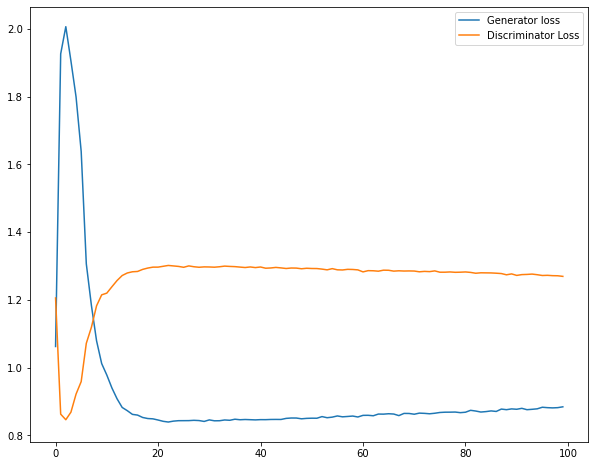

In [31]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure()
plt.plot(g_losses, label='Generator loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.legend()

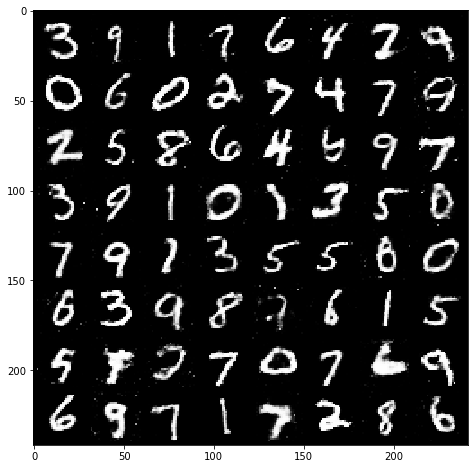

In [32]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Generator
z = torch.randn(64, 64).to(device)
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)

grid = make_grid(sample_images, nrow=8, normalize=True)
plt.imshow(grid.permute(1, 2, 0))